In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

**Exploratory Data analysis on the Dataset**

In [10]:
mnist_train = pd.read_csv('./sign_mnist_train.csv')
mnist_test = pd.read_csv('./sign_mnist_test.csv')

print(mnist_train.shape, mnist_test.shape)

(27455, 785) (7172, 785)


In [11]:
mnist_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [12]:
mnist_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [13]:
print(mnist_train.isna().any().any(), mnist_test.isna().any().any())#To Check for null values

False False


In [14]:
mnist_train_data = mnist_train.loc[:, "pixel1":]
mnist_train_label = mnist_train.loc[:, "label"]
mnist_test_data = mnist_test.loc[:, "pixel1":]
mnist_test_label = mnist_test.loc[:, "label"]

In [15]:
# Data Normalization
mnist_train_data = mnist_train_data/255.0
mnist_test_data = mnist_test_data/255.0

**DATA VISUALIZATION**

IMAGE LABEL: 2


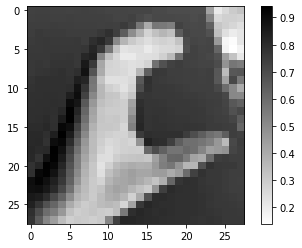

In [24]:
data_array = np.array(mnist_train_data.loc[2, :])
shaped_data = np.reshape(data_array, (28, 28))
sign_img = plt.imshow(shaped_data, cmap=plt.cm.binary)
plt.colorbar(sign_img)
print("IMAGE LABEL: {}".format(mnist_train.loc[2, "label"]))
plt.show()

**Using seaborn for data visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[1126, 1010, 1144, 1196, 957, 1204, 1090, 1013, 1162, 1114, 1241, 1055, 1151, 1196, 1088, 1279, 1294, 1199, 1186, 1161, 1082, 1225, 1164, 1118]


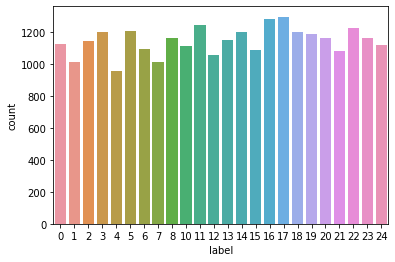

In [25]:
sns.countplot(mnist_train.label)
print(list(mnist_train.label.value_counts().sort_index()))

In [26]:
mnist_train_data = np.array(mnist_train_data)
mnist_test_data = np.array(mnist_test_data)
mnist_train_data = mnist_train_data.reshape(mnist_train_data.shape[0], 28, 28, 1)
mnist_test_data = mnist_test_data.reshape(mnist_test_data.shape[0], 28, 28, 1)
print(mnist_train_data.shape, mnist_train_label.shape)
#Reshaping Data

(27455, 28, 28, 1) (27455,)


**Encoding**

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras.optimizers import Adadelta
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import LearningRateScheduler

In [28]:
nclasses = mnist_train_label.max() - mnist_train_label.min() + 1
mnist_train_label = to_categorical(mnist_train_label, num_classes = nclasses)
print("Shape of ytrain after encoding: ", mnist_train_label.shape)

Shape of ytrain after encoding:  (27455, 25)


In [29]:
nclasses = mnist_test_label.max() - mnist_test_label.min() + 1
mnist_test_label = to_categorical(mnist_test_label, num_classes = nclasses)
print("Shape of ytest after encoding: ", mnist_test_label.shape)

Shape of ytest after encoding:  (7172, 25)


**Building a Convolutional Neural Network**

In [30]:
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(25, activation='softmax'))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [31]:
model_history = model.fit(mnist_train_data, mnist_train_label, batch_size=500, shuffle=True, epochs=20, validation_split=0.1)

Epoch 1/20
50/50 [==============================] - 102s 2s/step - loss: 1.8438 - accuracy: 0.4821 - val_loss: 3.2449 - val_accuracy: 0.0448
Epoch 2/20
50/50 [==============================] - 100s 2s/step - loss: 0.4128 - accuracy: 0.8841 - val_loss: 3.6643 - val_accuracy: 0.0444
Epoch 3/20
50/50 [==============================] - 99s 2s/step - loss: 0.1544 - accuracy: 0.9680 - val_loss: 3.9554 - val_accuracy: 0.0706
Epoch 4/20
50/50 [==============================] - 99s 2s/step - loss: 0.0729 - accuracy: 0.9892 - val_loss: 4.7834 - val_accuracy: 0.0448
Epoch 5/20
50/50 [==============================] - 99s 2s/step - loss: 0.0434 - accuracy: 0.9943 - val_loss: 4.6627 - val_accuracy: 0.0648
Epoch 6/20
50/50 [==============================] - 98s 2s/step - loss: 0.0302 - accuracy: 0.9960 - val_loss: 4.2633 - val_accuracy: 0.1027
Epoch 7/20
50/50 [==============================] - 99s 2s/step - loss: 0.0205 - accuracy: 0.9983 - val_loss: 3.9696 - val_accuracy: 0.1704
Epoch 8/20
50/50 [

In [32]:
mnist_train_data = mnist_train_data.reshape(mnist_train_data.shape[0], 784)
print(mnist_train_data.shape, mnist_train_label.shape)
vc_loss, vc_accuracy = model.evaluate(mnist_test_data, mnist_test_label)
print("\nLOSS: {}\nACCURACY: {}".format(vc_loss, vc_accuracy))

(27455, 784) (27455, 25)
225/225 [==============================] - 8s 36ms/step - loss: 0.1903 - accuracy: 0.9554

LOSS: 0.19027851521968842
ACCURACY: 0.9553820490837097


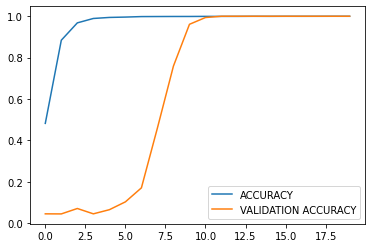

In [33]:
plt.plot(model_history.history['accuracy'],label = 'ACCURACY')
plt.plot(model_history.history['val_accuracy'],label = 'VALIDATION ACCURACY')
plt.legend()

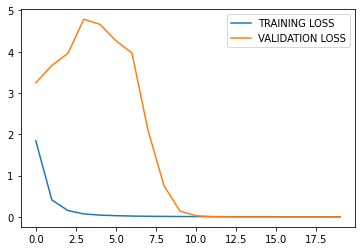

In [34]:
plt.plot(model_history.history['loss'],label = 'TRAINING LOSS')
plt.plot(model_history.history['val_loss'],label = 'VALIDATION LOSS')
plt.legend()

Final Result LOSS: 13% ACCURACY: 97%